In [9]:
# ! pip install qmplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from qmplot2.modules._manhattan import manhattanplot # the library file was modified to not highlight top SNP with other color
from qmplot2.modules._qq import qqplot
import seaborn as sns

In [3]:
sns.color_palette().as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [2]:
df = pd.read_csv('MLM_statistics.txt', sep='\t')
df = df[['Trait', 'Marker', 'Chr', 'Pos', 'p']]
df = df.dropna(how="any", axis=0)  # clean data
df.head()

,Trait,Marker,Chr,Pos,p
1,awns,IAB30003,1A,1211885.0,0.58458
2,awns,IAB00012,1A,3776696.0,0.22104
3,awns,IAB00017,1A,3847127.0,0.45764
4,awns,IAB15011,1A,4053566.0,0.31877
5,awns,IAB30030,1A,7279073.0,0.65662


In [3]:
traits = df['Trait'].unique()
traits

array(['awns', 'glumes_color', 'grain_shape', 'variety', 'development',
       'starch_content_2019', 'starch_content_2019_t',
       'septoria_blotch_leaf1_2019', 'septoria_blotch_leaf1_2019_t',
       'septoria_blotch_leaf2_2019', 'septoria_blotch_leaf2_2019_t',
       '1000_kernel_weight', 'Grain_estimate_score', 'Leaf_rust',
       'Leaf_rust_t', 'Lodging', 'days_to_heading', 'gluten_content',
       'gluten_content_t', 'grain_protein_content',
       'grain_protein_content_t', 'grain_yield', 'plant_height',
       'test_weight', 'starch_content_2019-2020',
       'starch_content_2019-2020_t', 'Stripe_rust_2018-2019',
       'Stripe_rust_2018-2019_t', 'septoria_blotch_2018-2019',
       'septoria_blotch_2018-2019_t'], dtype=object)

In [4]:
df.set_index('Trait', inplace=True)
df.head()

,Marker,Chr,Pos,p
Trait,,,,
awns,IAB30003,1A,1211885.0,0.58458
awns,IAB00012,1A,3776696.0,0.22104
awns,IAB00017,1A,3847127.0,0.45764
awns,IAB15011,1A,4053566.0,0.31877
awns,IAB30030,1A,7279073.0,0.65662


c:\Users\Михаил\Мой диск\GWAS статья\Manhattan\qmplot2\modules\_manhattan.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[[chrom]] = data[[chrom]].astype(str)  # make sure all the chromosome id are character.
c:\Users\Михаил\Мой диск\GWAS статья\Manhattan\qmplot2\modules\_manhattan.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[[chrom]] = data[[chrom]].astype(str)  # make sure all the chromosome id are character.
c:\Users\Михаил\Мой диск\GWAS статья\Manhattan\qmplot2\modules\_manhatta

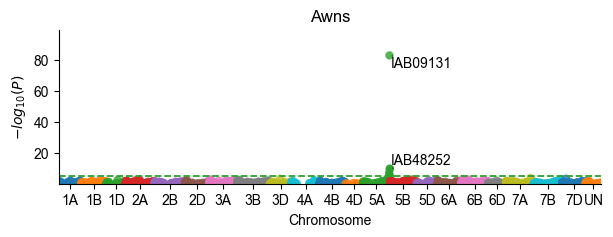

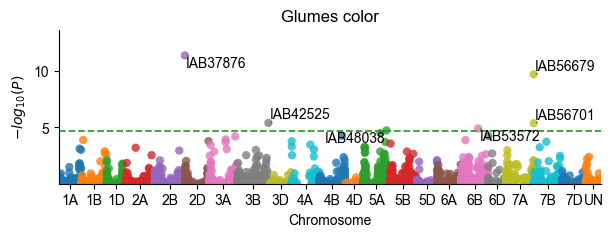

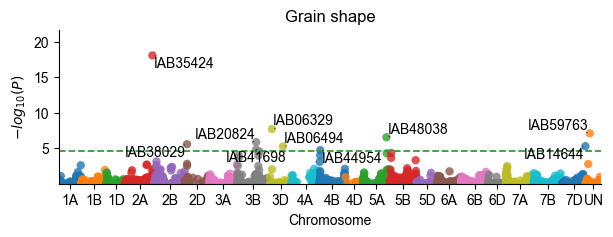

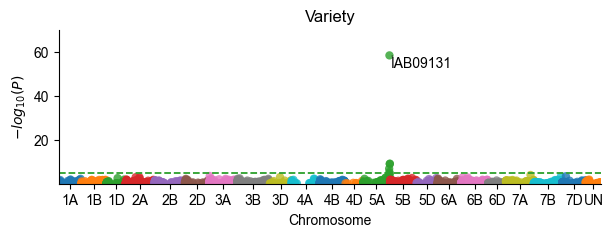

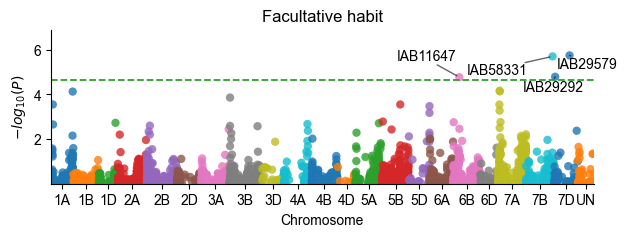

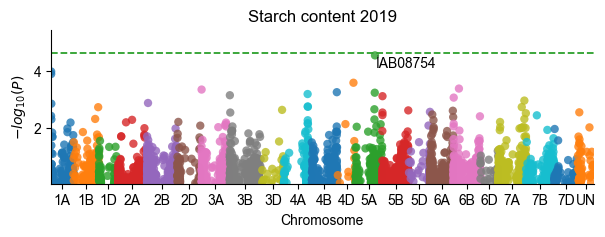

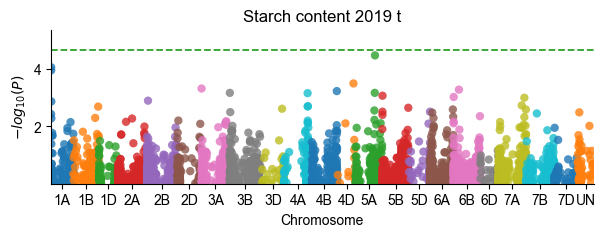

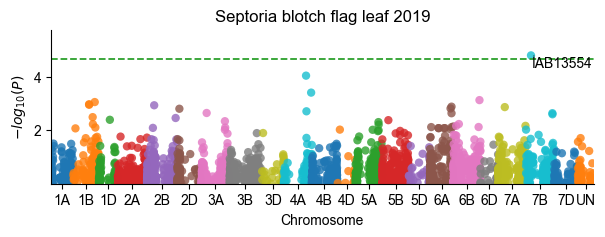

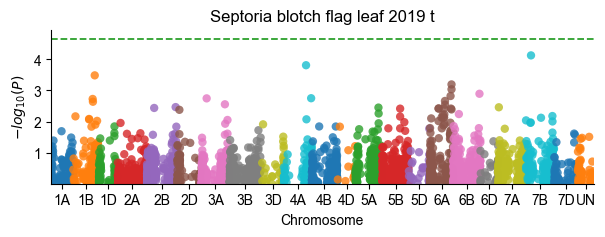

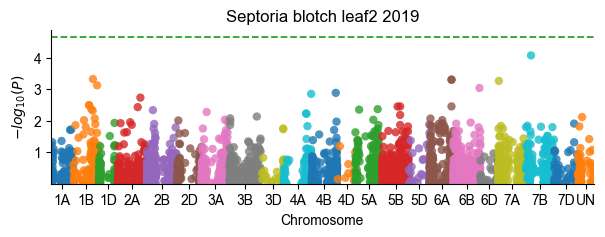

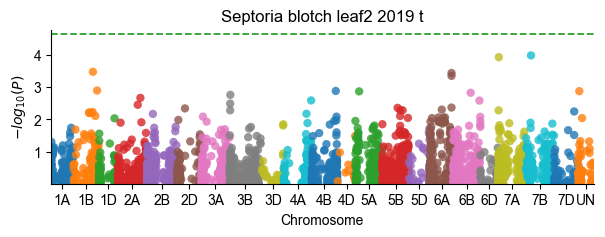

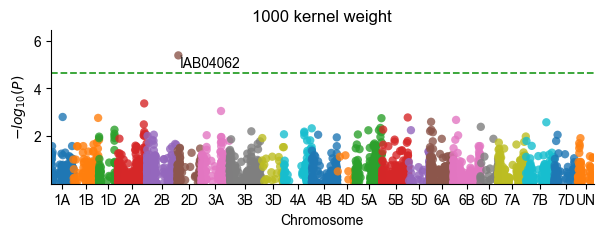

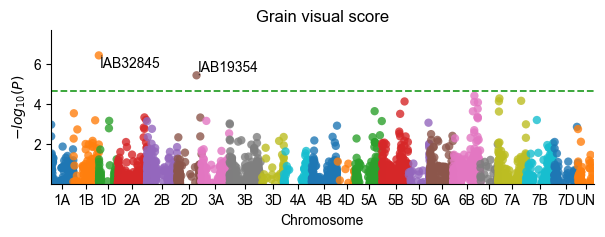

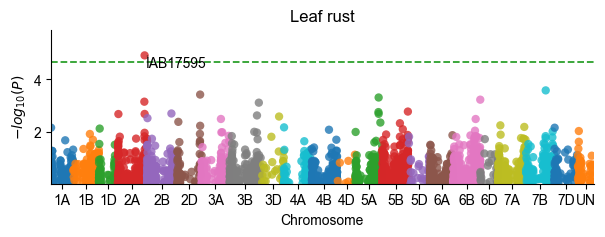

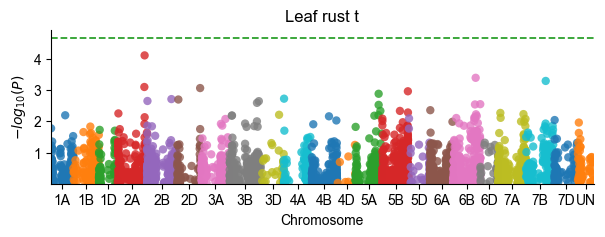

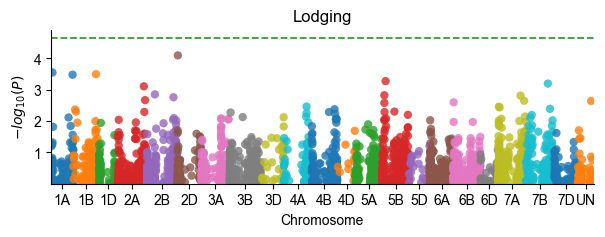

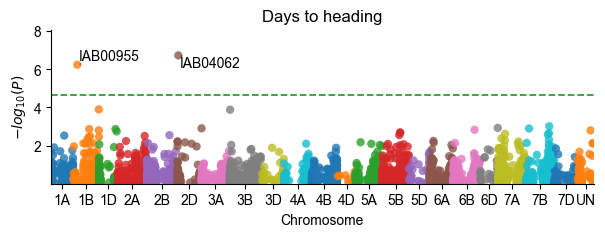

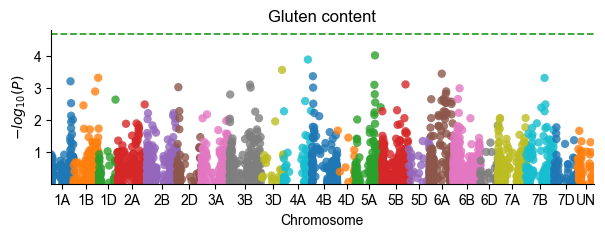

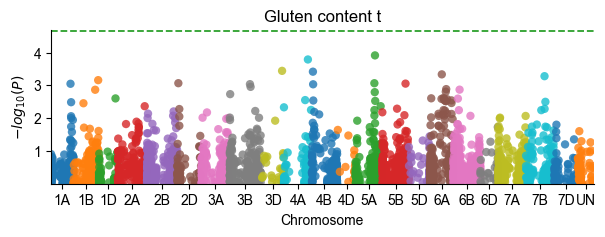

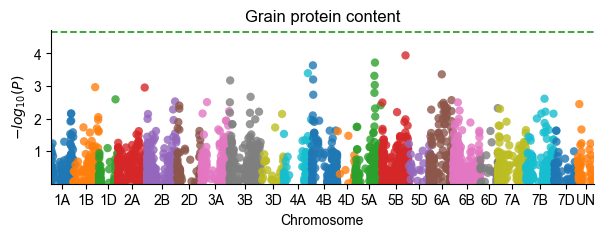

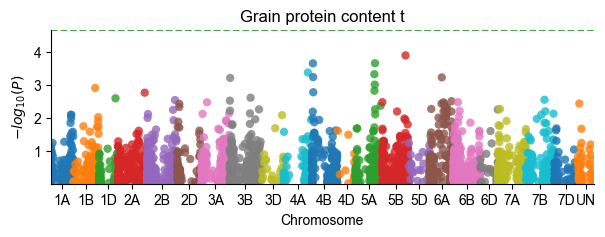

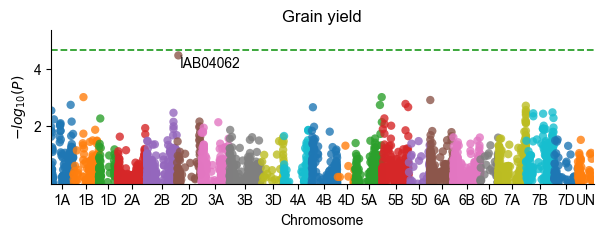

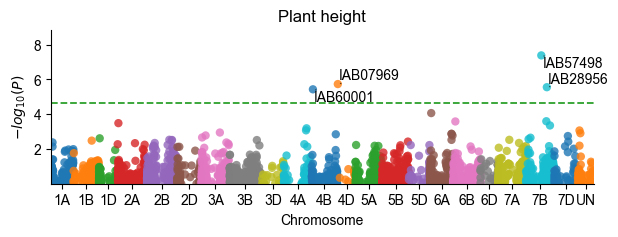

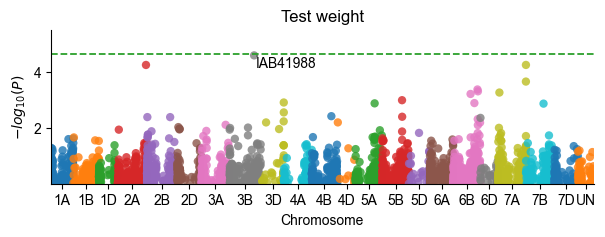

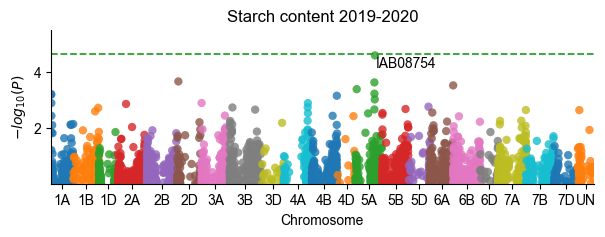

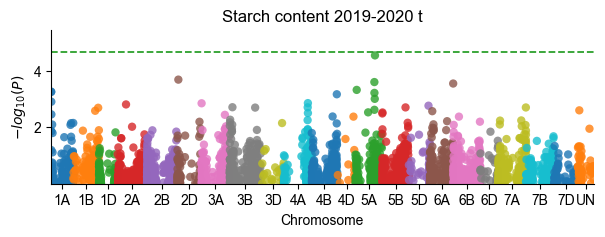

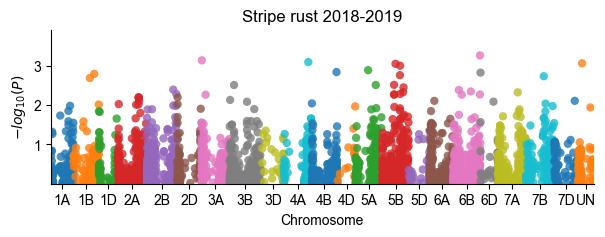

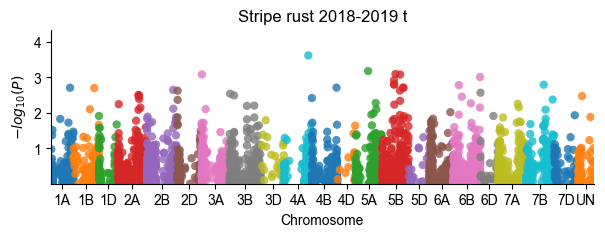

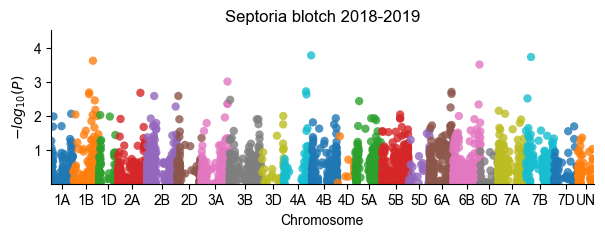

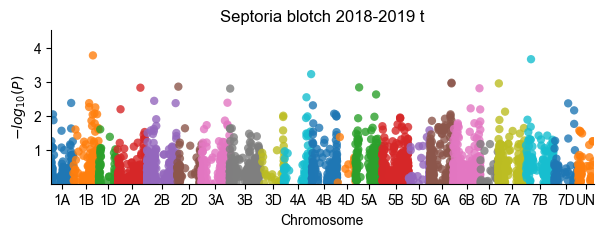

In [ ]:
for trait in traits:
    df_part = df.loc[trait]
    fig, ax = plt.subplots(figsize=(7, 2), facecolor='w', edgecolor='k')
    ax = manhattanplot(data=df_part,
                       chrom='Chr',
                       pos='Pos',
                       pv='p',
                       snp='Marker', 
                       
                       marker="o",
                       color=sns.color_palette().as_hex(),
                       sign_marker_p=(2.5e-10 if trait in ['awns', 'variety'] else
                                      5e-05 if trait in ['grain_yield', 'starch_content_2019', 'starch_content_2019-2020', 'test_weight'] else
                                      2.187e-05),  # Genome wide significant p-value
                       sign_marker_color="None",
                       
                       title=trait.replace('_', ' ').capitalize().replace('leaf1', 'flag leaf').replace('estimate', 'visual').replace('Development', 'Facultative habit'),
                       # xtick_label_set=xtick,
                       xlabel="Chromosome",
                       ylabel=r"$-log_{10}{(P)}$",

                       suggestiveline=None,
                       genomewideline=2.187e-05,
                       sign_line_cols=["#D62728", "#2CA02C"],
                       hline_kws={"linestyle": "--", "lw": 1.3},

                       is_annotate_topsnp=True,
                       ld_block_size=10000,  # 10 000 bp
                       text_kws={"fontsize": 12,  # The fontsize of annotate text
                                 "arrowprops": dict(arrowstyle="-", color="k", alpha=0.6)},
                        ax=ax)
    plt.savefig(trait + '_manhattan_plot.png', dpi=400, bbox_inches = 'tight')

C:\Users\Михаил\AppData\Local\Temp\ipykernel_11112\502807011.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(2, 2), facecolor="w", edgecolor="k")


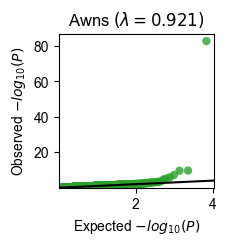

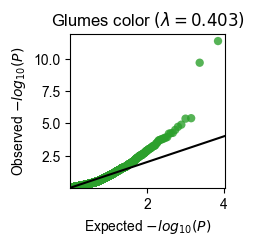

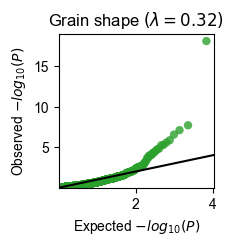

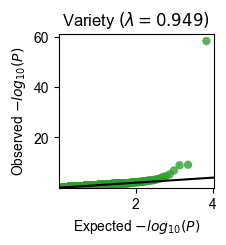

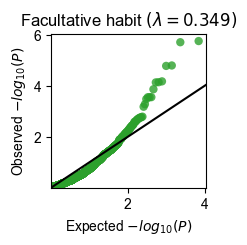

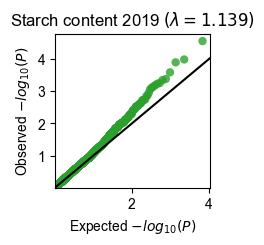

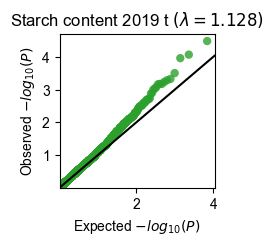

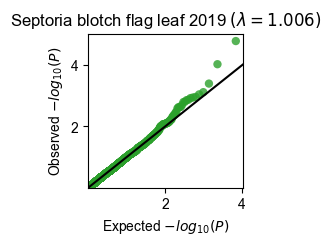

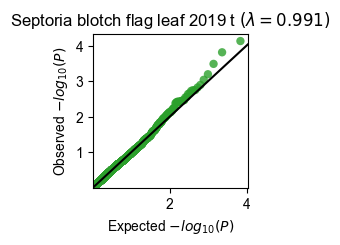

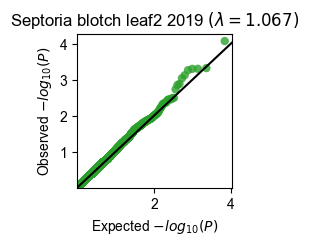

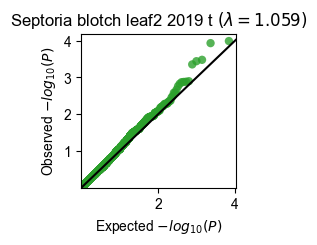

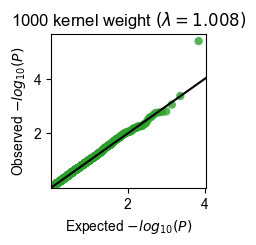

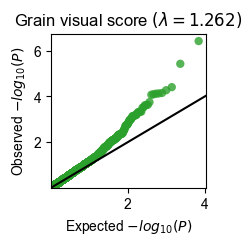

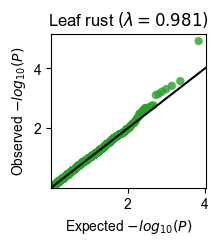

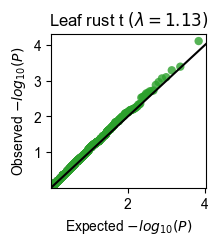

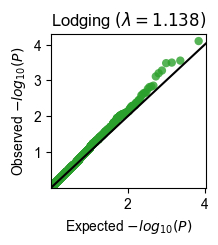

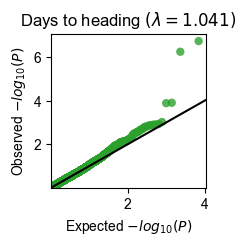

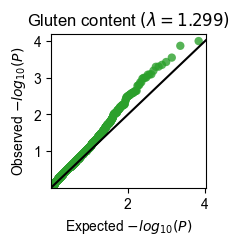

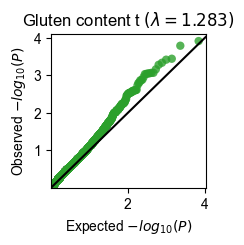

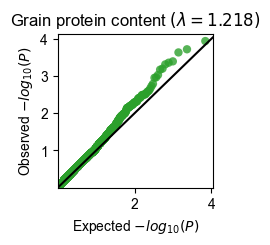

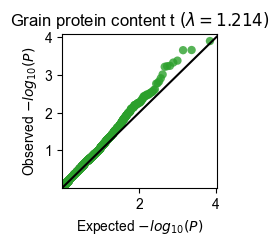

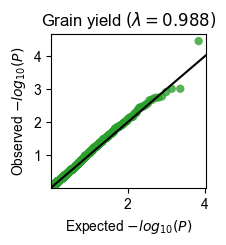

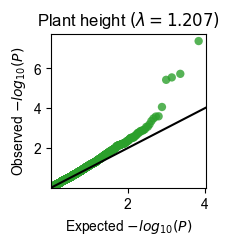

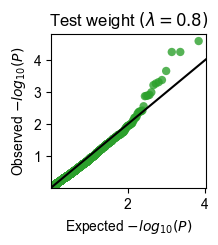

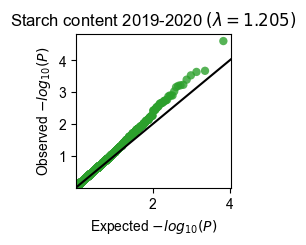

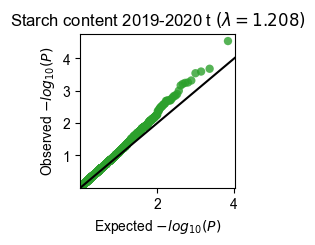

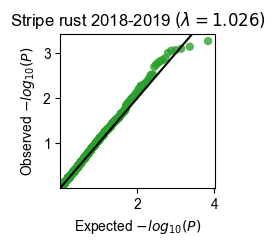

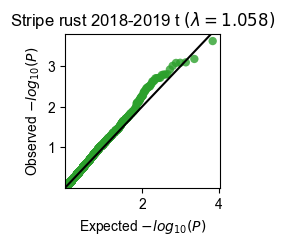

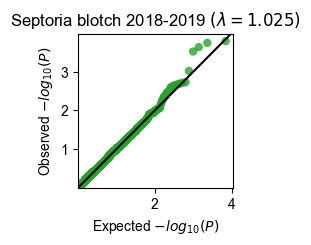

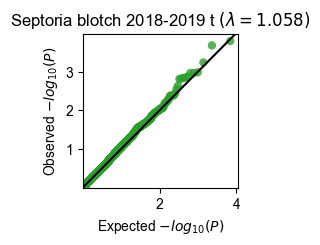

In [12]:
for trait in traits:
    df_part = df.loc[trait]
    fig, ax = plt.subplots(figsize=(2, 2), facecolor="w", edgecolor="k")
    qqplot(data=df_part['p'],
           color=sns.color_palette().as_hex()[2],
           ablinecolor="k",
           marker="o",
           title=trait.replace('_', ' ').capitalize().replace('leaf1', 'flag leaf').replace('estimate', 'visual').replace('Development', 'Facultative habit') + ' ',
           xlabel=r"Expected $-log_{10}{(P)}$",
           ylabel=r"Observed $-log_{10}{(P)}$",
           ax=ax)
    plt.savefig(trait + '_QQ_plot.png', dpi=400, bbox_inches = 'tight')